<a href="https://colab.research.google.com/github/xhackerino/DataAnalysis_OGNP/blob/main/SIAD_3_2_Rakin_Ilya_lab1_2_pynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

---



**Современные инструменты анализа данных - Clusterisation**


## Задание

1.   Используйте метод K-средних и метод DBSCAN на самостоятельно сгенерированной выборке с количеством кластеров не менее 4. Для увеличения числа кластеров при генерации можно задать количество центров в функции make_blobs через параметр centers.
2.   Используйте эти же два метода на датасете [Mall_Customers](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).
3.   Для каждого метода необходимо построить график.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#random data
frame, y = make_blobs(random_state=5, n_samples=400, centers=6)

In [ ]:
#array with 400 random values, first ten elements: 
frame[:10]

array([[-6.23416167,  8.18047859],
       [-7.12970024,  7.7990026 ],
       [-4.4597158 , -7.39306988],
       [ 6.2080393 ,  0.18237729],
       [-5.93575742,  5.99272157],
       [-7.77244708,  7.00077772],
       [ 5.5956281 , -1.8893431 ],
       [-1.61210845,  4.33665394],
       [-5.61579958,  9.51942024],
       [-8.97815961,  4.68669037]])

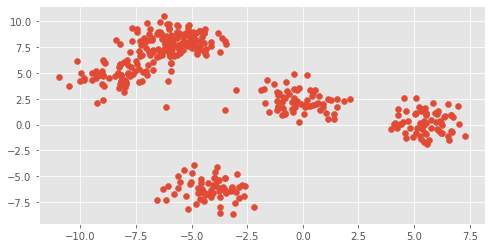

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(8,4)
plt.scatter(frame[:,0], frame[:,1])

### FIRST TASK


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#### Kmeans

In [ ]:
kmeans_model = KMeans(n_clusters=4, random_state=5) # 4 clusters
kmeans_model.fit(frame)
print(kmeans_model.labels_[:10], "etc.")

[0 0 2 1 0 0 1 3 0 0] etc.


RESULT

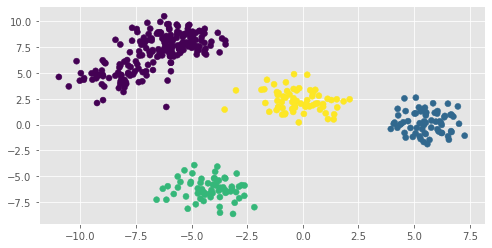

In [ ]:
#
plt.scatter(frame[:,0], frame[:,1], c=kmeans_model.labels_)

Elbow Rule (метод локтя)

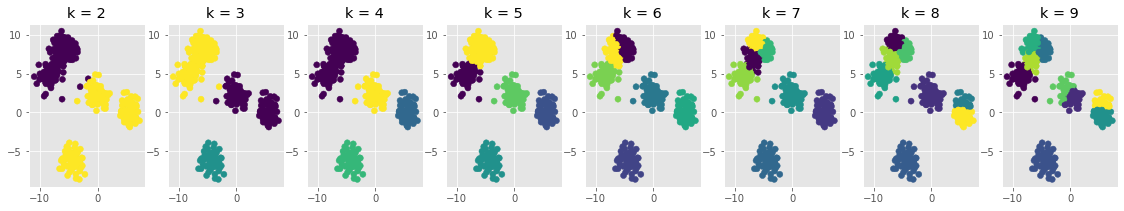

In [ ]:
criteries = list()
plt.rcParams['figure.figsize']=(22,3)
for k in range(2,10):
  kmeans_model=KMeans(n_clusters=k, random_state=5)
  kmeans_model.fit(frame)
  criteries.append(kmeans_model.inertia_)
  plt.subplot(190 + k)
  plt.scatter(frame[:,0], frame[:,1], c=kmeans_model.labels_)
  plt.title("k = " + str(k))

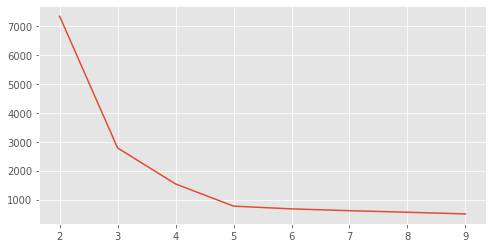

In [ ]:
plt.rcParams['figure.figsize']=(8,4)
plt.plot(range(2, 10), criteries)

Four clusters is optimal

Result for KMeans

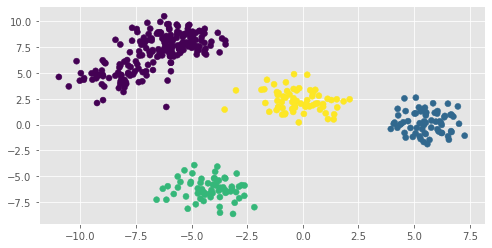

In [ ]:
kmeans_model = KMeans(n_clusters=4, random_state=5)
kmeans_model.fit(frame)
plt.scatter(frame[:,0], frame[:,1], c=kmeans_model.labels_)

#### DBscan

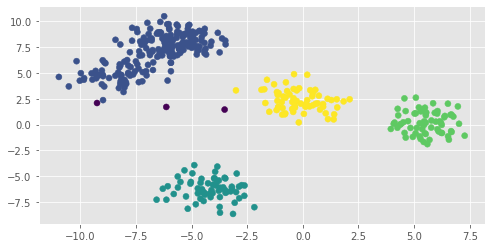

In [ ]:
db_model = DBSCAN(eps=1.3, min_samples=5).fit_predict(frame)
plt.scatter(frame[:,0], frame[:,1], c=db_model);

### Задание 2

Import mall_customers.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
data = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df = np.transpose([data.loc[:,"Annual Income (k$)"], data.loc[:,"Spending Score (1-100)"]])
print(data.head())
print("\n")
df[:10], "etc."

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40




(array([[15, 39],
        [15, 81],
        [16,  6],
        [16, 77],
        [17, 40],
        [17, 76],
        [18,  6],
        [18, 94],
        [19,  3],
        [19, 72]]), 'etc.')

Сырые данные

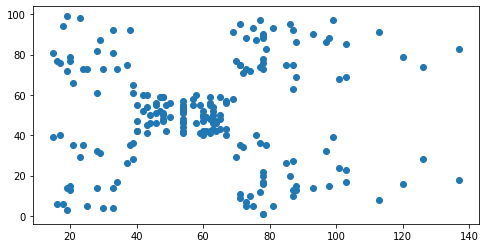

In [ ]:
plt.rcParams['figure.figsize']=(8,4)
plt.scatter(df[:,0], df[:,1])

#### KMeans

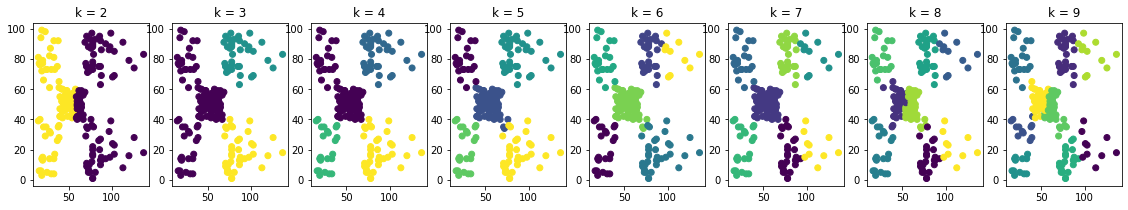

In [ ]:
res = list()
plt.rcParams['figure.figsize']=(22,3)
for k in range(2,10):
  kmeans_model=KMeans(n_clusters=k, random_state=5)
  kmeans_model.fit(df)
  res.append(kmeans_model.inertia_)
  plt.subplot(190 + k)
  plt.scatter(df[:,0], df[:,1], c=kmeans_model.labels_)
  plt.title("k = " + str(k))


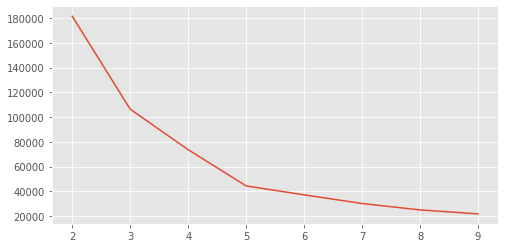

In [ ]:
plt.rcParams['figure.figsize']=(8,4)
plt.plot(range(2, 10), res)

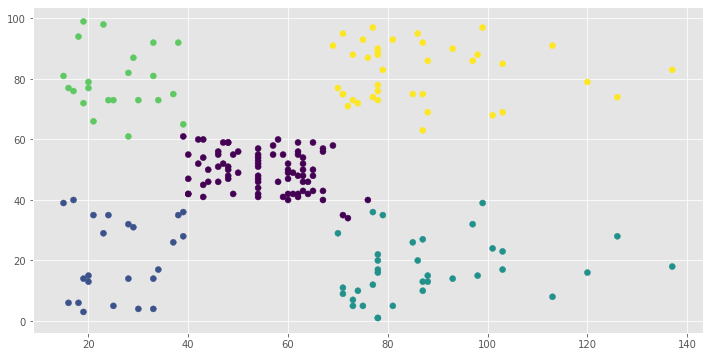

In [ ]:
kmeans_model = KMeans(n_clusters=5, random_state=4)
kmeans_model.fit(df)
plt.rcParams['figure.figsize']=(12,6)
plt.scatter(df[:,0], df[:,1], c=kmeans_model.labels_)

По кластерам покупатели разделены на небогатых, средних и тех, кто не отказывают себе в покупках. Так же классы небогатых и богатых делятся в зависимости от того, какую часть своего бюджета тратит покупатель.

#### DBscan

[ 0  1  2  1  0  1  2  3  2  1  2  3  2  1  2  1  0  1  0  3  0  1  2  1
  2  1  0  1  0  1  2  1  2  1  2  1  2  1  4  1  4  1  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  4  5  4  5  6  5  6  5  4  5  6  5  6  5  6  5  6  5  4  5
  6  5  4  5  6  5  6  5  6  5  6  5  6  5  6  5  4  5  6  5  6  5  6  5
  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6  5  6 -1  6  5  6 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


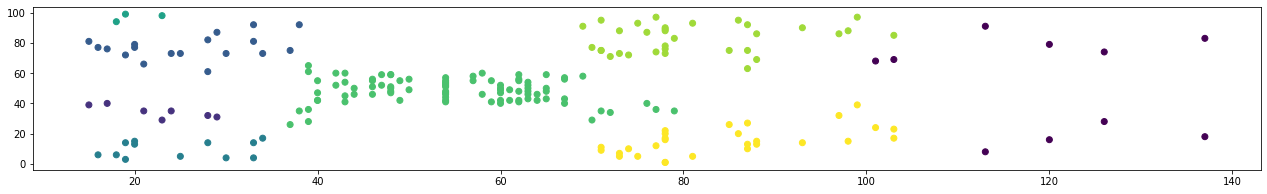

In [ ]:
db_model = DBSCAN(eps=9.2, min_samples=3).fit_predict(df)
print(db_model)
plt.scatter(df[:,0], df[:,1], c=db_model);

DBscan плохо определяет кластеры бедных, так как их плотность ниже среднего класса. Однако очень хорошо определены выбросы в виде людей со свербольшими доходами.

# Лабораторная работа №2

---



**Современные инструменты анализа данных - Анализ текста**


## Задание

**ваши жанры Pop и Rock** 
1. Для полученных жанров провести все этапы предварительной обработки текста (как в примере), обучить наивный байесовский классификатор, численно оценить его работу. Для улучшения качества обучения модели можно попробовать избавиться от знаков препинания и проследить, чтобы процентное соотношение песен обоих жанров было примерно 50 на 50.
2. Найти (нагуглить) по песне каждого из жанров, которые Вам достались, после необходимой обработки их текстов определить жанр обеих песен с помощью обученной в ходе выполнения предыдущего пункта модели.
3. С помощью набора данных по ссылке аналогичным образом научить модель отличать тексты песен Дэвида Боуи от текстов песен Пола МакКартни 
https://www.kaggle.com/italomarcelo/dataset-lyrics-music-mini

## Ход работы

In [ ]:
#importing libraries for work
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Задание 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset.csv
#https://www.kaggle.com/datasets/mehedihasan9021/movie-script-dataset
music = pd.read_csv("/content/drive/MyDrive/dataset.csv")
dframe = music[["genre", "lyrics"]]
dframe.head(3)

,genre,lyrics
0,Christian,"Who am I, that the Lord of all the earth Woul..."
1,Christian,Glory Revealed By His Wounds He was pierced ...
2,Christian,Lord of heaven and earth Lord of all creation...


We need only two genres

In [ ]:
dframe = dframe[(dframe.genre == "Pop") | (dframe.genre == "Rock")][:-13]
dframe["genre"].value_counts()

Pop     100
Rock     82
Name: genre, dtype: int64

Понижаем строки, токенизируем

In [ ]:
def lower_tokenize(dframe, lyrics="lyrics"):
  dframe[lyrics] = dframe[lyrics].str.lower()
  dframe[lyrics] = dframe.apply(lambda row: nltk.word_tokenize(row[lyrics]), axis=1)

lower_tokenize(dframe)
dframe

,genre,lyrics
272,Pop,"[yesterday, ,, all, my, troubles, seemed, so, ..."
273,Pop,"[i, made, it, through, the, wilderness, someho..."
274,Pop,"[what, you, want, ,, baby, ,, i, got, what, yo..."
275,Pop,"[you, are, my, fire, the, one, desire, believe..."
276,Pop,"[hey, look, i, cant, get, no, satisfaction, i,..."
...,...,...
449,Rock,"[i, get, the, same, old, dreams, same, time, e..."
450,Rock,"[know, me, broken, by, my, master, and, teach,..."
451,Rock,"[sitting, on, a, park, bench, eyeing, little, ..."
452,Rock,"[how, can, you, see, into, my, eyes, like, ope..."


Make some cleaning

In [ ]:
def clear(dframe, lyrics="lyrics"):
  useless = stopwords.words('english')
  nonstop = dframe[lyrics].apply(lambda x: [item for item in x if item not in useless])
  full = list()
  for i in nonstop:    
    full.append(", ".join(i))
  dframe[lyrics] = full
  cleaned = dframe[lyrics].apply(lambda x: [lemmatizer.lemmatize(x)])
  clean = list()
  for a in cleaned:    
    clean.append(", ".join(a))
  dframe[lyrics] = clean

clear(dframe)

In [ ]:
dframe["lyrics"]

272    yesterday, ,, troubles, seemed, far, away, loo...
273    made, wilderness, somehow, made, didnt, know, ...
274    want, ,, baby, ,, got, need, ,, know, got, ?, ...
275    fire, one, desire, believe, say, want, way, tw...
276    hey, look, cant, get, satisfaction, cant, get,...
                             ...                        
449    get, old, dreams, time, every, night, fall, gr...
450    know, broken, master, teach, thee, child, love...
451    sitting, park, bench, eyeing, little, girls, b...
452    see, eyes, like, open, doors, ?, leading, core...
453    dont, want, ya, dont, need, ya, dont, bother, ...
Name: lyrics, Length: 182, dtype: object

In [ ]:
#import some more
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import * 

Split data between train and test


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dframe.lyrics, dframe.genre, train_size = 0.7)

In [ ]:
#vectorize
vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorized_x_train = vectorizer.fit_transform(x_train)

In [ ]:
#classify
classify = MultinomialNB()
classify.fit(vectorized_x_train, y_train)
vectorized_x_test = vectorizer.transform(x_test)
classify.predict(vectorized_x_test)[:20]

array(['Rock', 'Pop', 'Pop', 'Pop', 'Pop', 'Pop', 'Pop', 'Rock', 'Pop',
       'Rock', 'Pop', 'Pop', 'Pop', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock',
       'Rock', 'Pop'], dtype='<U4')

Оценка


In [ ]:
perc = classify.predict(vectorized_x_test)
print(classification_report(y_test, perc))

              precision    recall  f1-score   support

         Pop       0.60      0.64      0.62        33
        Rock       0.40      0.36      0.38        22

    accuracy                           0.53        55
   macro avg       0.50      0.50      0.50        55
weighted avg       0.52      0.53      0.52        55



### Задание 2

Rock music **'In the End' by Linkin Park**

Pop music **'Umbrella' by Rihanna**

In [ ]:
rocksong = "One thing I don't know why It doesn't even matter how hard you try Keep that in mind, I designed this rhyme To explain in due time All I know Time is a valuable thing Watch it fly by as the pendulum swings Watch it count down to the end of the day The clock ticks life away It's so unreal Didn't look out below Watch the time go right out the window Tryin' to hold on, did-didn't even know I wasted it all just to watch you go I kept everything inside and even though I tried It all fell apart What it meant to me will eventually Be a memory of a time when I tried so hard I tried so hard and got so far But in the end it doesn't even matter I had to fall to lose it all But in the end it doesn't even matter One thing, I don't know why It doesn't even matter how hard you try Keep that in mind, I designed this rhyme To remind myself how I tried so hard In spite of the way you were mockin' me Acting like I was part of your property Remembering all the times you fought with me I'm surprised it got so far Things aren't the way they were before You wouldn't even recognize me anymore Not that you knew me back then But it all comes back to me in the end You kept everything inside and even though I tried It all fell apart What it meant to me will eventually Be a memory of a time when I tried so hard I tried so hard and got so far But in the end it doesn't even matter I had to fall to lose it all But in the end it doesn't even matter I've put my trust in you Pushed as far as I can go For all this There's only one thing you should know I've put my trust in you Pushed as far as I can go For all this There's only one thing you should know I tried so hard and got so far But in the end it doesn't even matter I had to fall to lose it all But in the end it doesn't even matter"
popsong = "Uh huh, uh huh Yeah, Rihanna Uh huh, uh huh Good girl gone bad Uh huh, uh huh Take three, action Uh huh, uh huh, Hov No clouds in my stones Let it rain, I hydroplane in the bank Comin' down at the Dow Jones When the clouds come, we gone We Rocafella We fly higher than weather In G5s or better You know me In anticipation for precipitation stack chips for the rainy day Rain Man is back with little Ms. Sunshine Rihanna, where you at? You have my heart, and we'll never be worlds apart Maybe in magazines, but you'll still be my star Baby, 'cause in the dark You can't see shiny cars And that's when you need me there With you I'll always share Because When the sun shines, we'll shine together Told you I'll be here forever Said I'll always be your friend Took an oath, I'ma stick it out 'til the end Now that it's raining more than ever Know that we'll still have each other You can stand under my umbrella You can stand under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh, eh, eh, eh These fancy things will never come in between You're part of my entity, here for infinity When the world has took its part When the world has dealt its cards If the hand is hard, together we'll mend your heart Because When the sun shines, we shine together Told you I'll be here forever Said I'll always be your friend Took an oath, I'ma stick it out 'til the end Now that it's raining more than ever Know that we'll still have each other You can stand under my umbrella You can stand under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh, eh, eh, eh You can run into my arms It's okay, don't be alarmed Come into me (There's no distance in between our love) So gon' and let the rain pour I'll be all you need and more Because When the sun shines, we shine together Told you I'll be here forever Said I'll always be your friend Took an oath, I'ma stick it out 'til the end Now that it's raining more than ever Know that we'll still have each other You can stand under my umbrella You can stand under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh Under my umbrella, ella, ella, eh, eh, eh, eh, eh, eh It's raining, raining Ooh, baby, it's raining, raining Baby, come into me Come into me It's raining, raining Ooh, baby, it's raining, raining You can always come into me Come into me It's pouring rain It's pouring rain Come into me Come into me It's pouring rain It's pouring rain"
dfr = pd.DataFrame([["linkinpark", rocksong], ["rihanna", popsong]], columns=["genre", "lyrics"], index=[1, 2])
dfr

,genre,lyrics
1,linkinpark,One thing I don't know why It doesn't even mat...
2,rihanna,"Uh huh, uh huh Yeah, Rihanna Uh huh, uh huh Go..."


Обработка

In [ ]:
lower_tokenize(dfr)
clear(dfr)

In [ ]:
dfr

,genre,lyrics
1,linkinpark,"one, thing, n't, know, n't, even, matter, hard..."
2,rihanna,"uh, huh, ,, uh, huh, yeah, ,, rihanna, uh, huh..."


Используем уже тренированную модель

In [ ]:
vectorized_song_test = vectorizer.transform(dfr.lyrics)
classify.predict(vectorized_song_test)

array(['Pop', 'Pop'], dtype='<U4')

Совпало только одно(

### Задание 3

In [ ]:
#https://www.kaggle.com/datasets/italomarcelo/dataset-lyrics-music-mini
last = pd.read_csv("/content/drive/MyDrive/dataset-lyrics-musics-mini.csv")
dfl = last[["cantorNome", "letra"]]
dfl

,cantorNome,letra
0,david-bowie,"I, I will be king. And you, you will be queen...."
1,david-bowie,"Didn't know what time it was,. The lights were..."
2,david-bowie,Ground control to Major Tom. Ground control to...
3,david-bowie,It's a god-awful small affair. To the girl wit...
4,david-bowie,I know when to go out. And when to stay in. Ge...
...,...,...
1743,ac-dc,The video game says Play me. Face it on a leve...
1744,ac-dc,Wanna tell you a story. 'Bout a woman I know. ...
1745,ac-dc,You can roll me round your finger. You can rol...
1746,ac-dc,She was a fast machine. She kept the motor cle...


In [ ]:
dfl = dfl[(dfl.cantorNome == "david-bowie") | (dfl.cantorNome == "paul-mccartney")][19:]
print(dfl["cantorNome"].value_counts())

david-bowie       464
paul-mccartney    464
Name: cantorNome, dtype: int64


In [ ]:
lower_tokenize(dfl, lyrics="letra")
clear(dfl, lyrics="letra")
print(dfl)

         cantorNome                                              letra
19      david-bowie  ahhh, ...., ahhh, ...., doo, ,, doo, ,, doo, ,...
20      david-bowie  america, ,, sha, la, la, la, la, ., little, pi...
21      david-bowie  could, escape, feeling, china, girl, ., feel, ...
22      david-bowie  pulled, behind, bridge, ., lays, ,, frowns, .,...
23      david-bowie  paint, cracking, ., look, backstairs, buddy, ....
..              ...                                                ...
942  paul-mccartney  's, young, boy, looking, way, find, love, ., n...
943  paul-mccartney  hope, reach, love, ., help, discover, ., 're, ...
944  paul-mccartney  like, ., please, n't, take, heart, away, ., 's...
945  paul-mccartney  yvonne, one, i´ve, counting, ., said, long, yo...
946  paul-mccartney                                       instrumental

[928 rows x 2 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dfl.letra, dfl.cantorNome, train_size = 0.7)

vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorized_x_train = vectorizer.fit_transform(x_train)

classify = MultinomialNB()
classify.fit(vectorized_x_train, y_train)
vectorized_x_test = vectorizer.transform(x_test)
classify.predict(vectorized_x_test)[:20]

array(['paul-mccartney', 'david-bowie', 'david-bowie', 'david-bowie',
       'david-bowie', 'david-bowie', 'paul-mccartney', 'paul-mccartney',
       'david-bowie', 'paul-mccartney', 'paul-mccartney',
       'paul-mccartney', 'paul-mccartney', 'david-bowie', 'david-bowie',
       'david-bowie', 'paul-mccartney', 'paul-mccartney',
       'paul-mccartney', 'david-bowie'], dtype='<U14')

In [ ]:
perc = classify.predict(vectorized_x_test)
print(classification_report(y_test, perc))

                precision    recall  f1-score   support

   david-bowie       0.69      0.79      0.74       135
paul-mccartney       0.77      0.66      0.71       144

      accuracy                           0.72       279
     macro avg       0.73      0.73      0.72       279
  weighted avg       0.73      0.72      0.72       279



I'm Done. (c) Rakin Ilya SIAD 3.2 